## K Means 

**Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


**Load and Preprocess dataset**

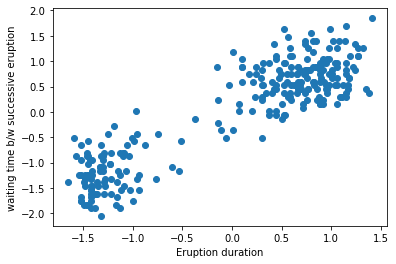

In [4]:
data = pd.read_csv('faithful.csv')
data = data.iloc[:,1:]

# Standardize Data 
data['eruptions'] = (data['eruptions'] - data['eruptions'].mean())/ ( data['eruptions'].std())
data['waiting'] = (data['waiting'] - data['waiting'].mean())/ ( data['waiting'].std())

plt.xlabel('Eruption duration')
plt.ylabel('waiting time b/w successive eruption')
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.show()

**Clearly there are only two clusters. So we will use K = 2 for K-Means Algorithm**

**Function 1 : Plot_now() : To plot current stage of algorithm**

In [6]:
def plot_now(iteration) : 

    colors = ['red' if Z[i]==1 else 'blue' for i in range(N)] # Assign color to each point based on its corresponding cluster 
    
    # Plot dataset
    plt.scatter(data.iloc[:,0],data.iloc[:,1], c = colors, s= 10)
    
    # Draw current centroids 
    plt.scatter([μ1[iteration-1][0]],[μ1[iteration-1][1]],marker='X',c='red',s=200)
    plt.scatter([μ2[iteration-1][0]],[μ2[iteration-1][1]],marker='X',c='blue',s=200)
    
    # Draw bisector 
    x1, y1 = μ1[iteration-1]
    x2, y2 = μ2[iteration-1]
    slope_ = -1/((y2-y1)/(x2 - x1))  # slope of perpendicular bisector 
    point = ( (x1 + x2)/2., (y1 + y2)/2. )  # mid-point 
    plt.axline(point, slope= slope_, color='pink')
    
    plt.xlabel('Eruption duration')
    plt.ylabel('waiting time b/w successive eruption')
    plt.title('Iteration : %d'%(iteration))
    plt.plot()

    plt.pause(1) # Pause for 1 second 

**K Means Algorithm Implementation**

Starting K-Means Algorithm
1564.6088126638401 405.15709173572066


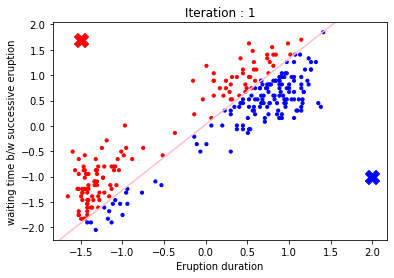

206.9439487182689 80.67024936423091


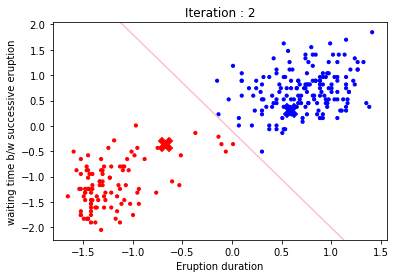

79.61313721646096 79.3428826546958


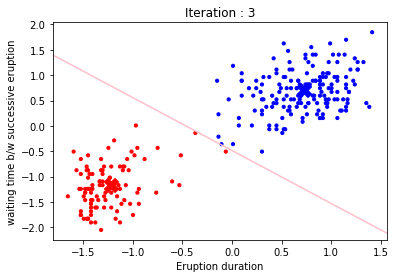

79.31314233585123 79.28340081368779


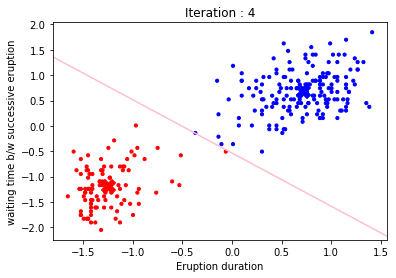

79.28340081368779 79.28340081368779


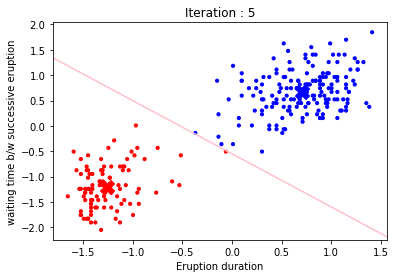

Finishing K-Means Algorithm. Bye!


In [26]:
# Cleary there are 2 clusters , let's use K-Means with K=2 to find plausible centroids of these two clusters 

K = 2 

N = len(data) # no of points in dataset 

print("Starting K-Means Algorithm")

# K-means algoirhtm implementation

# intitialize randomly  two centroids μ1(0),  μ2(0)  as two different point of dataset 

μ1_0, μ2_0 = [ [-1.5,1.7], [2 , -1]]

μ1, μ2 = [μ1_0], [μ2_0]  # Store previously calculated centroids

Z = [ np.random.choice([1,2]) for i in range(N)]

# E-Step : 

# Assign each point to 1 of two cluster based on euclidean distance from 
# centroid's and assign every point to closest of these two clusters 

t = 0 
epsilon =  10**(-6)

J = [] # cost function values 
color_cost = [] # to store corresponding to E-step and M-step for each iteration

while True : 

    for i in range(N) :

        #E-Step begins 
        point = data.iloc[i,:].values
        d1 = np.linalg.norm(μ1[t] - point)**2
        d2 = np.linalg.norm(μ2[t] - point)**2
        
        if d1 < d2 : 
            Z[i] = 1  # assign ith point to 1st cluster
        else : 
            Z[i] = 2  # assign ith point to 2nd cluster
        # end of E-Step    
    
    cost_E_step = np.sum([ np.linalg.norm(data.iloc[i,:].values - μ1[t] )**2 if Z[i]==1 else np.linalg.norm(data.iloc[i,:].values - μ2[t] )**2  \
                      for i in range(N) ])
    J.append(cost_E_step)
    color_cost.append('blue')
    
    # M- Step : Update Centroids μ1(t+1), μ2(t+1)
    μ1_new = np.array([ data.iloc[i,:].values for i in range(N) if Z[i]==1 ])
    μ1_new = np.sum(μ1_new, axis=0) / len(μ1_new)

    μ2_new = np.array([ data.iloc[i,:].values for i in range(N) if Z[i]==2 ])
    μ2_new = np.sum(μ2_new, axis=0) / len(μ2_new)
    μ1.append(μ1_new)
    μ2.append(μ2_new)
    # End of M- Step

    cost_M_step = np.sum([ np.linalg.norm(data.iloc[i,:].values - μ1[t+1] )**2 if Z[i]==1 else np.linalg.norm(data.iloc[i,:].values - μ2[t+1] )**2  \
                      for i in range(N) ])
    J.append(cost_M_step)
    color_cost.append('red')

    print(cost_E_step,cost_M_step)
    
    plot_now(t+1)
    
    if ( np.linalg.norm(μ1[t+1] - μ1[t]) < epsilon ) and  ( np.linalg.norm(μ2[t+1] - μ2[t]) < epsilon ) : 
        print("Finishing K-Means Algorithm. Bye!")
        break     
    
    t = t + 1



**Plot loss function at the end of each E-step ('blue') and M-step('red') for each iteration**

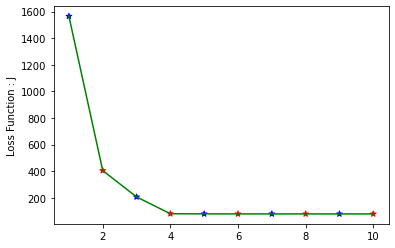

In [34]:
plt.plot(range(1,len(J)+1),J,c='green')
plt.ylabel('Loss Function : J')
plt.scatter(range(1,len(J)+1),J,c=color_cost, marker='*')
plt.show()